# Linear Model & Regularization
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-11-13

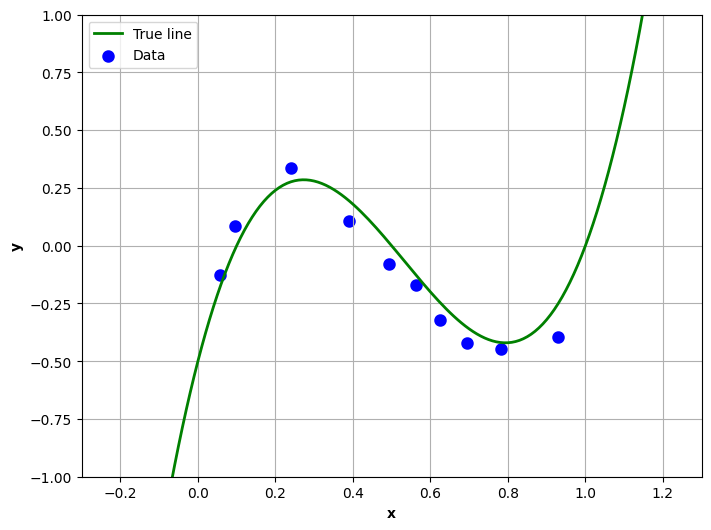

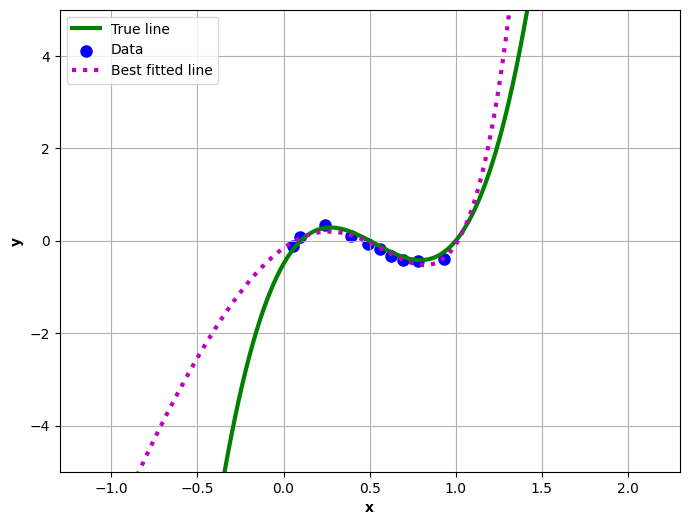

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def comp_poly(pa, x):
    """ Compute polynomial values for given parameters and x-values """
    n = len(pa) - 1
    powx = x ** np.arange(n, -1, -1)
    return np.dot(powx, pa)

def cost_J(pa, x, y, lambda_reg):
    """ Compute the cost function for given parameters and data """
    n = len(pa) - 1
    powx = x ** np.arange(n, -1, -1)
    return np.sum((np.dot(powx, pa) - y.flatten()) ** 2) + lambda_reg * np.dot(pa, pa)

def cost_dJ(pa, x, y, lambda_reg):
    """ Compute the gradient of the cost function """
    n = len(pa) - 1
    powx = x ** np.arange(n, -1, -1)
    dJ = np.array([2 * np.sum((np.dot(powx, pa) - y.flatten()) * powx[:, i]) + lambda_reg * pa[i] for i in range(n+1)])
    return dJ

# Set the random seed for numpy's RNG
np.random.seed(180)

# y = 10*(x-0.1)(x-0.5)(x-1);
xin = np.random.rand(10, 1)
yin = 10 * (xin - 0.1) * (xin - 0.5) * (xin - 1) + (np.random.rand(10, 1) - 0.5) * 0.3  # add noise

# Plotting the data
fig1 = plt.figure(1)
fig1.set_size_inches(8, 6)

x_graph = np.arange(-1, 2, 0.01)
y_graph = 10 * (x_graph - 0.1) * (x_graph - 0.5) * (x_graph - 1)
plt.plot(x_graph, y_graph, 'g', linewidth=2, label='True line')
plt.scatter(xin, yin, color='b', linewidth=3, label='Data')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel('x', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.xlim([-0.3, 1.3])
plt.ylim([-1, 1])
plt.gca().set_prop_cycle(None)
plt.show()

# Gradient Descent of a polynomial model & Regularization
n_iter = 50000
l_r = 0.05
lambda_reg = 0.001
order = 6

params = np.zeros((order+1, n_iter))

# Initialize the parameters randomly
params[:, 0] = 2 * (np.random.rand(order+1, 1) - 0.5).flatten()

# Gradient Descent
for ii in range(n_iter-1):
    dJ = cost_dJ(params[:, ii], xin, yin, lambda_reg)
    params[:, ii+1] = params[:, ii] - l_r * dJ

# Plotting the fitted polynomial
fig2 = plt.figure(2)
fig2.set_size_inches(8, 6)

x_test = np.arange(-1.3, 2.3, 0.01)[:, None]
y_test = comp_poly(params[:, -1], x_test)

plt.plot(x_graph, y_graph, 'g', linewidth=3, label='True line')
plt.scatter(xin, yin, color='b', linewidth=3, label='Data')
plt.plot(x_test, y_test, ':m', linewidth=3, label='Best fitted line')
plt.legend(loc=2)
plt.grid(True)
plt.xlabel('x', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.xlim([-1.3, 2.3])
plt.ylim([-5, 5])
plt.show()